In [1]:
#Import packages :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
#Load data to DataFrame, and reformating columns name
df = pd.read_csv('input00.txt',sep='\t').reset_index(drop=True)
size = int(df.columns.values)
df['MonthNum'] = np.arange(1,61)
df.columns = ['Passengers','MonthNum']
df = df[['MonthNum','Passengers']]

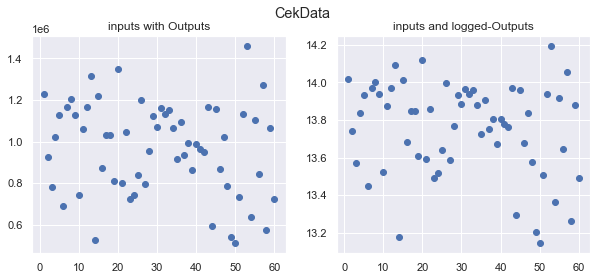

In [3]:
#Creating Inputs and outputs array from DataFrame
Inputs, Outputs = df['MonthNum'], df['Passengers']
Inputs = Inputs.values.reshape((-1,1))

#Plot the data to see if data transformation needed
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,4))
fig.suptitle('CekData')
ax1.scatter(Inputs,Outputs)
ax1.set_title('inputs with Outputs')
ax2.scatter(Inputs,np.log(Outputs))
ax2.set_title('inputs and logged-Outputs')
plt.show()

In [4]:
#from the look of the plot, there is big magnitude gap between Inputs and Outputs 
#   So, the output will be transformed using Logarithm
#(Or can also be using scaler)
#   from sklearn import preprocessing as pp
#   scaledoutputs = pp.scale(Outputs)
LoggedOutputs = np.log(Outputs)

In [6]:
#Modelling - Linear Regression
#The data are not splitted into Train and Test data, because their size is just too litle
model = LinearRegression()
model.fit(Inputs,LoggedOutputs)

LinearRegression()

In [7]:
#RSquared :
model.score(Inputs,LoggedOutputs)
#RSquared = 0.03827948032110906

0.03827948032110906

In [8]:
#Calculating Regression Accuracy
LoggedOutputs2 = LoggedOutputs.values.reshape((-1,1))
YHat = model.predict(LoggedOutputs2)
TrainingAccuracy = np.average((100-(((np.absolute(YHat-LoggedOutputs))/LoggedOutputs)*100)))
print('Training Accuracy =',TrainingAccuracy,'%')
#Training Accuracy = 98.56046054186207 %

Training Accuracy = 98.56046054186207 %


In [21]:
#Creating Array containing Inputs to be predicted, which are the 61st to 73rd Months
MonthToPredict = np.array([i for i in range(61,73)]).reshape((-1,1))

#Prediction
Passengers_2_Weeks_In_Advance = np.exp(model.predict(MonthToPredict)).round(0)

In [24]:
PredictedPassengers = pd.DataFrame()
PredictedPassengers['NumOfPassengers'] = Passengers_2_Weeks_In_Advance
PredictedPassengers

,NumOfPassengers
0,866060.0
1,863671.0
2,861289.0
3,858913.0
4,856544.0
5,854181.0
6,851825.0
7,849475.0
8,847132.0
9,844795.0


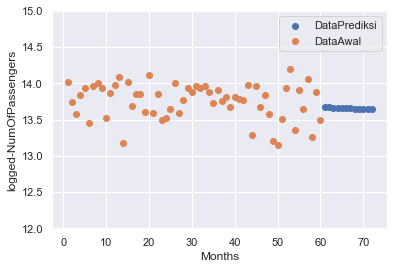

In [10]:
#Plot the data with prediction trend
plt.scatter(MonthToPredict,np.log(Passengers_2_Weeks_In_Advance),label='DataPrediksi')
plt.scatter(Inputs, np.log(Outputs), label = 'DataAwal')
plt.xlabel('Months')
plt.ylabel('logged-NumOfPassengers')
plt.ylim(12,15)
plt.legend()